In [1]:
import pandas as pd,numpy as np

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id',axis=1,inplace=True)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
numcol=df.select_dtypes(include=['float64'])
correlationMat=numcol.corr()
correlationMat

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

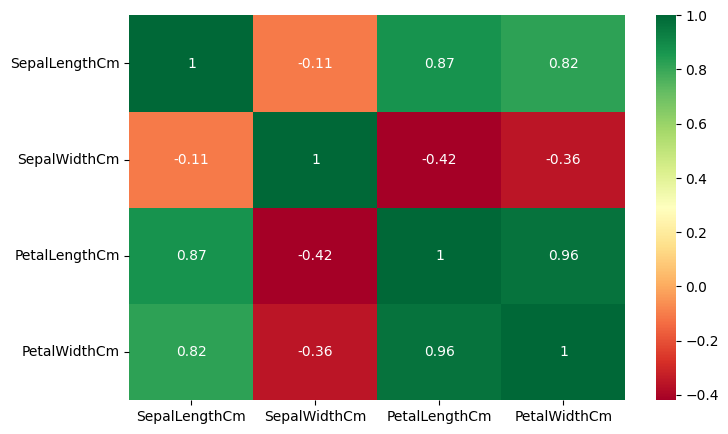

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(correlationMat,annot=True,cmap='RdYlGn')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
print('The Number of Rows: ',df.shape[0])
print('The Number of columns: ',df.shape[1])

The Number of Rows:  150
The Number of columns:  5


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [13]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [14]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [15]:
df.duplicated().sum()

3

In [16]:
df.drop_duplicates(inplace=True)

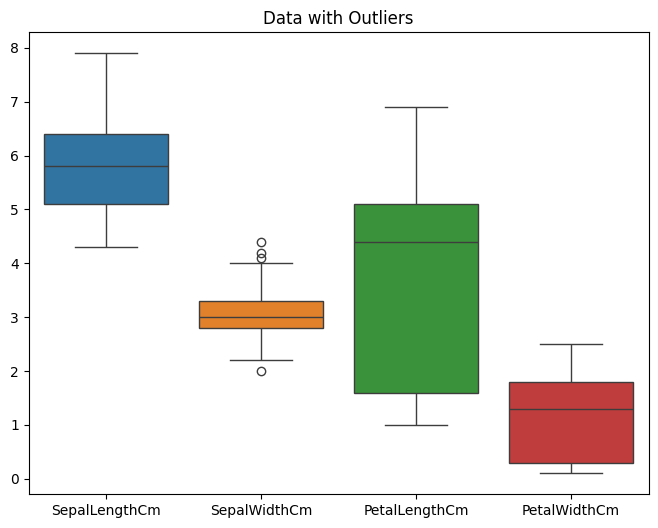

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(df)
plt.title('Data with Outliers')
plt.show()

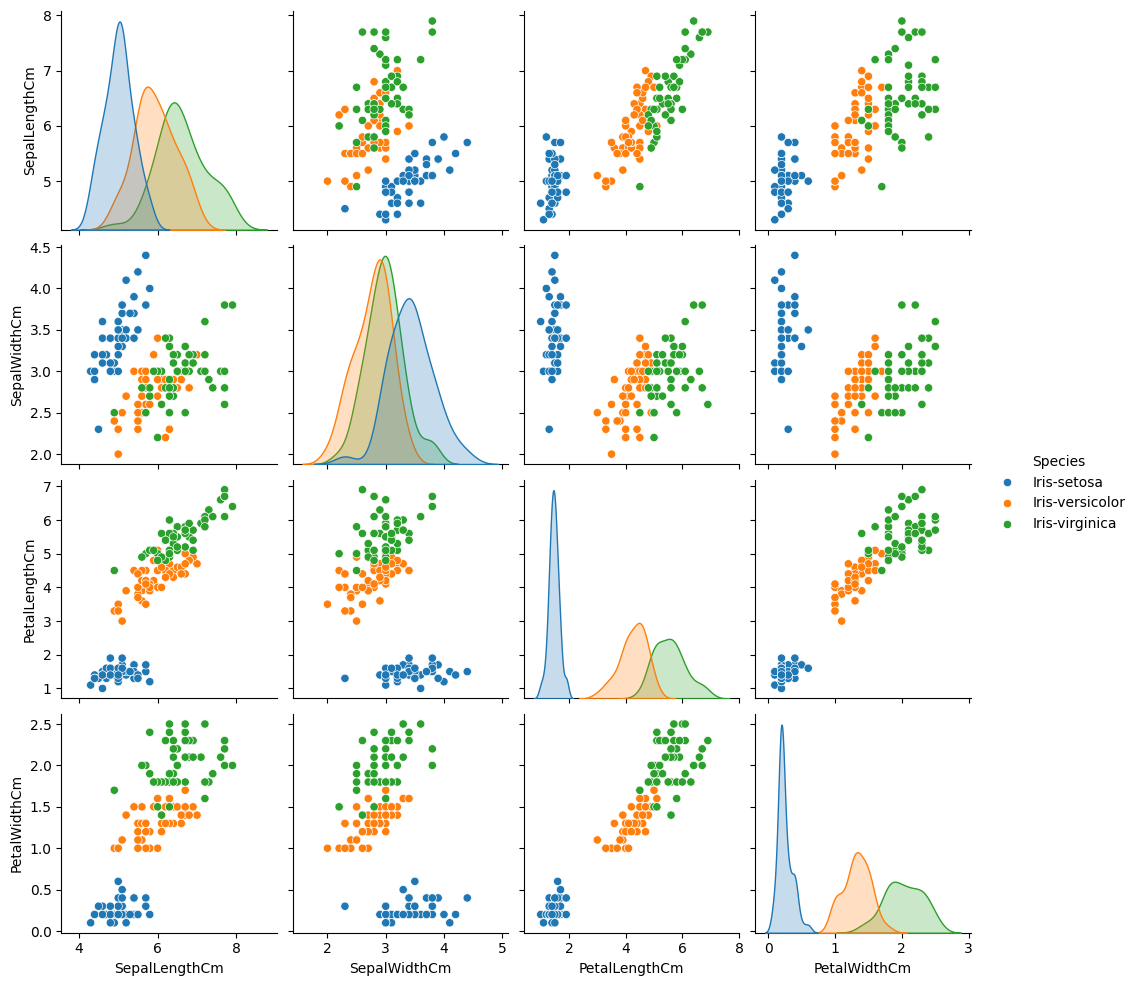

In [18]:
sns.pairplot(df,hue='Species',diag_kind = 'kde')
plt.show()

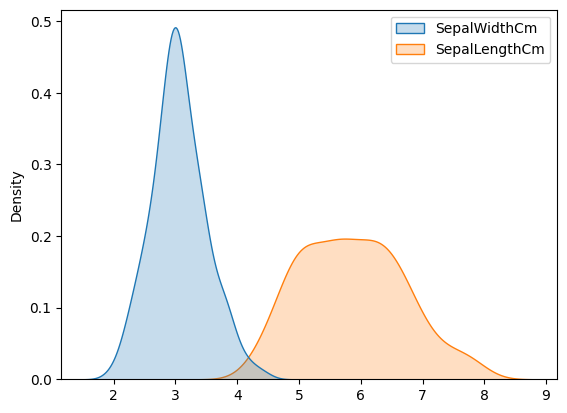

In [19]:
sns.kdeplot(df[['SepalWidthCm', 'SepalLengthCm']] ,fill=True)
plt.show()

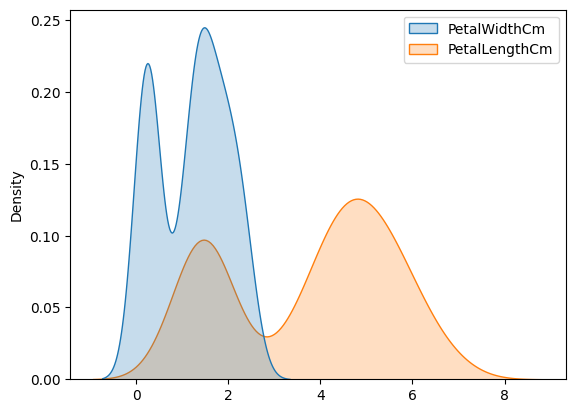

In [20]:
sns.kdeplot(df[['PetalWidthCm', 'PetalLengthCm']], fill=True)
plt.show()

# Model building

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
x=df.drop('Species',axis=1)
y=df['Species']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
clf=LogisticRegression()

In [25]:
clf.fit(x_train,y_train)
yhat=clf.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix,ConfusionMatrixDisplay

In [35]:
cf=confusion_matrix(y_test,yhat)

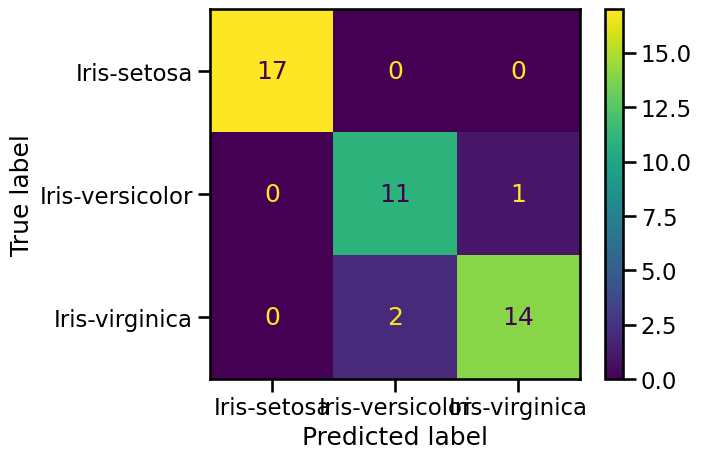

In [40]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=clf.classes_)
disp.plot()
plt.show()

In [27]:
print(classification_report(y_test,yhat))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [28]:
print('accuracy_score: ',accuracy_score(y_test,yhat))

accuracy_score:  0.9333333333333333


In [29]:
import pickle
with open('iris_model.pkl','wb') as f:
    pickle.dump(clf,f)